# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

Top 10 countries with most projects
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64


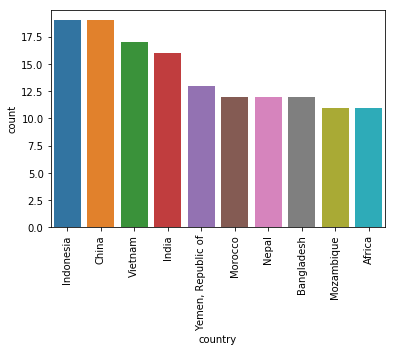

In [133]:
## Find the 10 countries with most projects
df_json = pd.read_json('data/world_bank_projects.json')
#print(df_json.shape)

country_count = df_json['countryshortname'].value_counts()
print("Top 10 countries with most projects")
print(country_count.head(10))

import matplotlib.pyplot as plt
import seaborn as sns
top10_c = country_count.head(10).to_frame().reset_index()
top10_c.columns = ['country', 'count']
#print(top10_c.head())
sns.barplot(x=top10_c['country'], y=top10_c['count'])
plt.xticks(rotation=90)
plt.show()

In [134]:
## Find the top 10 major project themes (using column 'mjtheme_namecode')
## load json as string and using normalize to get 'mjtheme_namecode' as a dataframe
json_string = json.load((open('data/world_bank_projects.json')))
projects = json_normalize(json_string, 'mjtheme_namecode')
#print(projects.head())

## find the most frequent code
code_count = projects['code'].value_counts()
print("Top 10 major project themes")
print(code_count.head(10))


Top 10 major project themes
11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64


code  name                                        
11    Environment and natural resources management    250
10    Rural development                               216
8     Human development                               210
2     Public sector governance                        199
6     Social protection and risk management           168
4     Financial and private sector development        146
7     Social dev/gender/inclusion                     130
5     Trade and integration                            77
9     Urban development                                50
1     Economic management                              38
dtype: int64
  code                                          name  count
0   11  Environment and natural resources management    250
1   10                             Rural development    216
2    8                             Human development    210
3    2                      Public sector governance    199
4    6         Social protection and risk management    

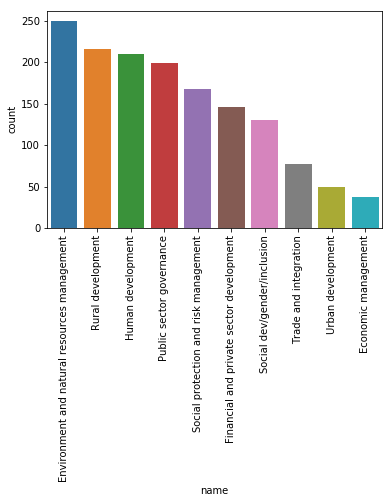

In [139]:
# In 2. above you will notice that some entries have only the code and the name is missing. 
# Create a dataframe with the missing names filled in.

## sort the df by code
projects_sorted = projects.sort_values(by=['code', 'name'], ascending=False)
#projects_sorted
#print(projects_sorted.head())

## build a dictionary of code:name
code_name = {}
for index, row in projects_sorted.iterrows():
    if row['code'] in code_name.keys():
        continue
    else:
        code_name[row['code']] = row['name']
##print(code_name)

## re-map the name against its code
projects_sorted['name'] = projects_sorted.code.map(code_name)

## re-run the top code_name to see if it matches the code counts in #2
max_theme = projects_sorted.groupby(['code', 'name']).size().sort_values(ascending=False)
print(max_theme.head(10))

top10 = max_theme.head(10).to_frame().reset_index()
#print(top10.head())
top10.columns = ['code', 'name','count']
#print(top10.head())
sns.barplot(x=top10['name'], y=top10['count'])
plt.xticks(rotation=90)
plt.show()

code  name                                        
11    Environment and natural resources management    250
10    Rural development                               216
8     Human development                               210
2     Public sector governance                        199
6     Social protection and risk management           168
4     Financial and private sector development        146
7     Social dev/gender/inclusion                     130
5     Trade and integration                            77
9     Urban development                                50
1     Economic management                              38
dtype: int64


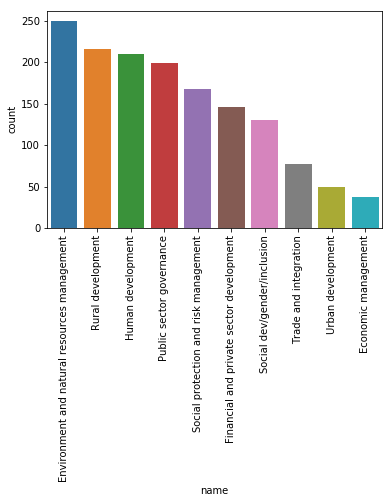

In [160]:
## Another solution to problem 3
import numpy as np
projects_sorted = projects.sort_values(by=['code', 'name'], ascending=False)
#print(projects_sorted.head(50))
projects_sorted['name'].replace("", np.nan, inplace=True)
full_name = projects_sorted.groupby('code')['name'].fillna(method='ffill')
projects_sorted['name'] = full_name
#print(projects_sorted.head(2))

max_theme = projects_sorted.groupby(['code', 'name']).size().sort_values(ascending=False)
print(max_theme.head(10))

top10 = max_theme.head(10).to_frame().reset_index()
#print(top10.head())
top10.columns = ['code', 'name','count']
#print(top10.head())
sns.barplot(x=top10['name'], y=top10['count'])
plt.xticks(rotation=90)
plt.show()
